In [16]:
import omnixai as oxai
from omnixai.data.image import Image
from loadfunctions import *

In [25]:
input_width = 128
input_height = int(input_width*.75)
input_channels = 3
input_total_image_size = input_width*input_height*input_channels

In [11]:
all_images,src_images,resized_images= get_image_lists()   
print(len(all_images))
print(len(src_images))
print(len(resized_images))
print(src_images[0])
np_images_list = resize(src_images,input_width,int(input_width*.75))
np_images_list[0].shape

198
99
99
/home/jovyan/work/nasa_planet_dataset/1019.jpg


(96, 128, 3)

In [12]:
np_images = np.array(np_images_list,dtype='float16',ndmin=(4))

In [17]:
images = oxai.data.image.Image(data=np_images, batched=True)

Data shape: (99, 96, 128, 3)
Image shape: (96, 128, 3)
The first image (Pillow):


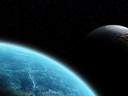

The second image (Pillow):


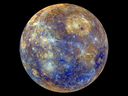

Loop:
(1, 96, 128, 3)
(1, 96, 128, 3)
(1, 96, 128, 3)
(1, 96, 128, 3)
(1, 96, 128, 3)


In [18]:
print(f"Data shape: {images.shape}")
print(f"Image shape: {images.image_shape}")

print(f"The first image (Pillow):")
display(images[0].to_pil())
print(f"The second image (Pillow):")
display(images[1].to_pil())

print("Loop:")
for im in images[:5]:
    print(im.shape)

In [26]:
from sklearn.cluster import MiniBatchKMeans
total_clusters = 5
# Initialize the K-Means model
kmeans = MiniBatchKMeans(n_clusters = total_clusters)
# Fitting the model to training set
kmeans.fit(np_images.reshape((-1,input_total_image_size)))

MiniBatchKMeans(n_clusters=5)

In [27]:
kmeans.labels_


array([0, 3, 0, 3, 0, 0, 3, 0, 3, 1, 0, 0, 2, 3, 0, 2, 0, 1, 3, 0, 2, 3,
       0, 0, 0, 3, 1, 1, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 3, 2, 3, 2, 0, 0,
       0, 1, 1, 0, 3, 1, 1, 2, 0, 0, 1, 3, 3, 1, 3, 0, 0, 0, 2, 1, 3, 2,
       3, 0, 3, 1, 3, 1, 3, 0, 0, 2, 3, 0, 0, 2, 0, 0, 0, 0, 0, 2, 1, 2,
       3, 3, 3, 0, 3, 0, 3, 4, 0, 0, 0], dtype=int32)

class:0
0


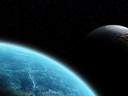

2


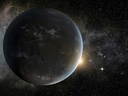

4


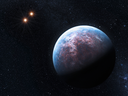

5


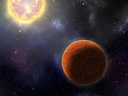

7


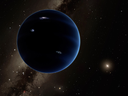

10


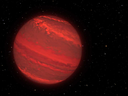

11


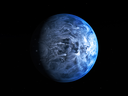

14


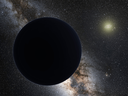

16


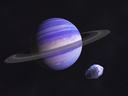

19


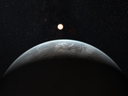

22


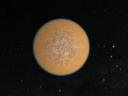

23


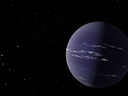

24


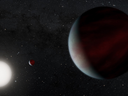

28


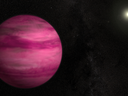

29


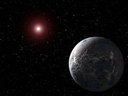

31


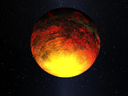

32


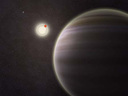

33


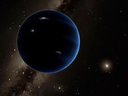

36


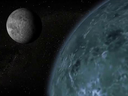

42


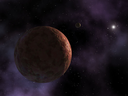

43


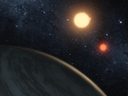

44


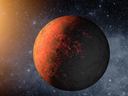

47


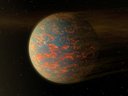

52


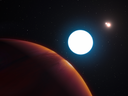

53


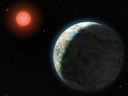

59


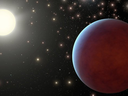

60


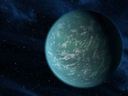

61


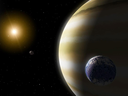

67


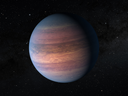

73


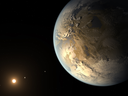

74


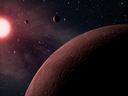

77


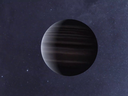

78


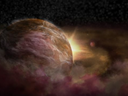

80


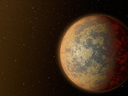

81


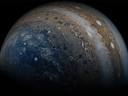

82


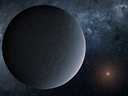

83


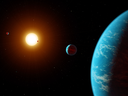

84


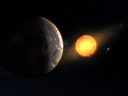

91


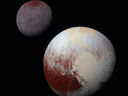

93


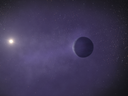

96


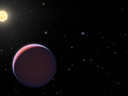

97


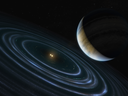

98


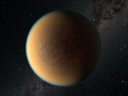

class:1
9


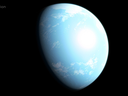

17


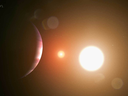

26


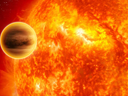

27


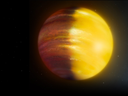

35


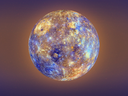

37


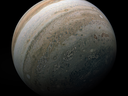

45


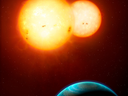

46


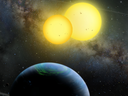

49


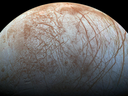

50


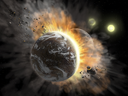

54


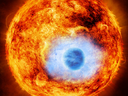

57


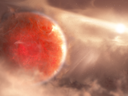

63


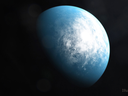

69


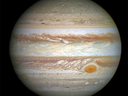

71


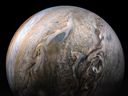

86


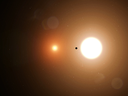

class:2
12


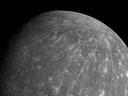

15


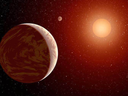

20


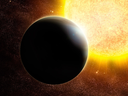

30


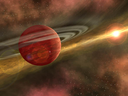

34


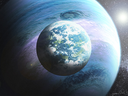

39


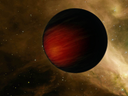

41


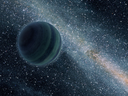

51


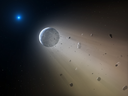

62


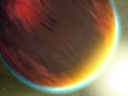

65


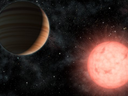

75


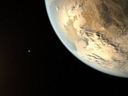

79


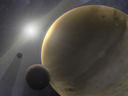

85


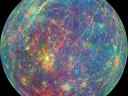

87


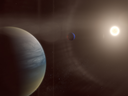

class:3
1


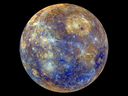

3


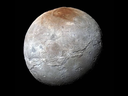

6


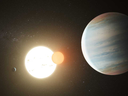

8


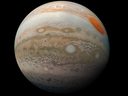

13


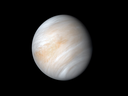

18


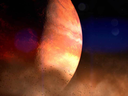

21


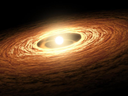

25


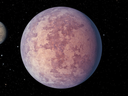

38


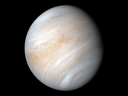

40


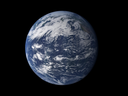

48


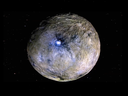

55


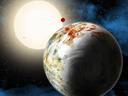

56


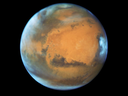

58


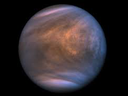

64


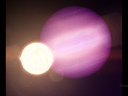

66


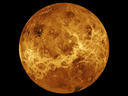

68


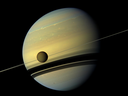

70


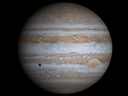

72


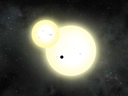

76


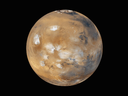

88


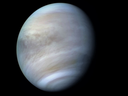

89


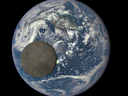

90


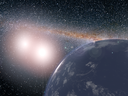

92


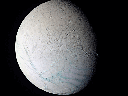

94


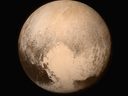

class:4
95


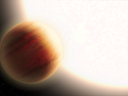

In [43]:
for c in range(total_clusters):
    print(f'class:{c}')
    for i,img in enumerate(np_images):        
        if kmeans.labels_[i] == c:
            print(i)
            display(images[i].to_pil())
        
    

In [36]:
reference_labels = retrieve_info(kmeans.labels_,list(range(5)))

TypeError: only integer scalar arrays can be converted to a scalar index